<a href="https://colab.research.google.com/github/ikhomkodes/ColabProjects-ikhomkodes/blob/main/Simple_Plagiarism_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What actually Plagiarism is and Some Plagiarism Tools:
### @author: Khom Raj Thapa Magar(171347)
Plagiarism is a form of intellectual theft and fraud.
Plagiarism may include:


*   Copying and pasting from a source without attaching the text to quotation marks and giving a citation.
*   Summing up or rephrasing another person's thoughts without giving a reference.
*   Submitting an assignment completed by someone else.
*   Self-plagiarism i.e. reusing the assignment one has submitted for the previous course.
*   Working on an assignment with a friend or classmate that is meant to be finished individually.

Plagiarism tools are the modern tools that we use to detect the portions of duplicate or copied content in everything from research journals to site content. There are different plagiarism detection tools available. 
Following are the top free plagiarism detection tools for eLearning professionals:


01.   Dupli Checker
02.   Copy Leaks
03.   Plagiarisma
04.   Plagiarism Checker
05.   Plagium
06.   PlagScan
07.   PlagTracker
08.   Quetext
09.   PaperRater
10.   Plagiarismhunt

# 1. Dupli Checker
Dupli Checker is perhaps the best free plagiarism checker on the Internet. Although it doesn't have an elegant interface, it undeniably works fine.


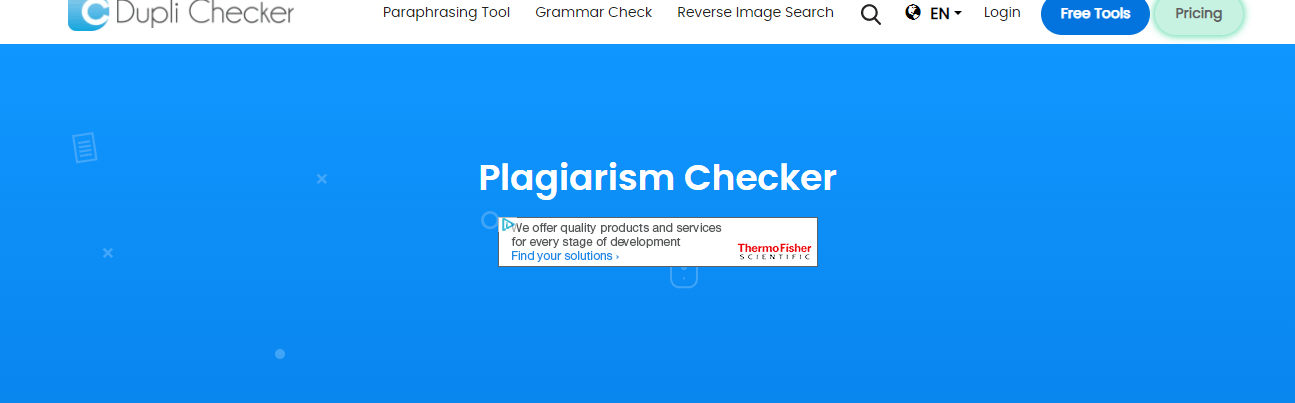


  *fig. 1. Dupli Checker*
[Image Source](https://static.javatpoint.com/blog/images/plagiarism-detection-tools1.png)


Pros
1. Free of cost
2. Usuability
3. 2 Ways to Check for Plagiarism (i.e. first way is to simply copy & paste the content in the field, and the second one is to upload the text file or Docx from ones computer)

Cons
1. One Search Per Day for Unregistered Users


# 2. Copyleaks
The Copyleaks plagiarism tool is a cloud-based authentication platform which allows us to track how the eLearning content is being used over the internet.

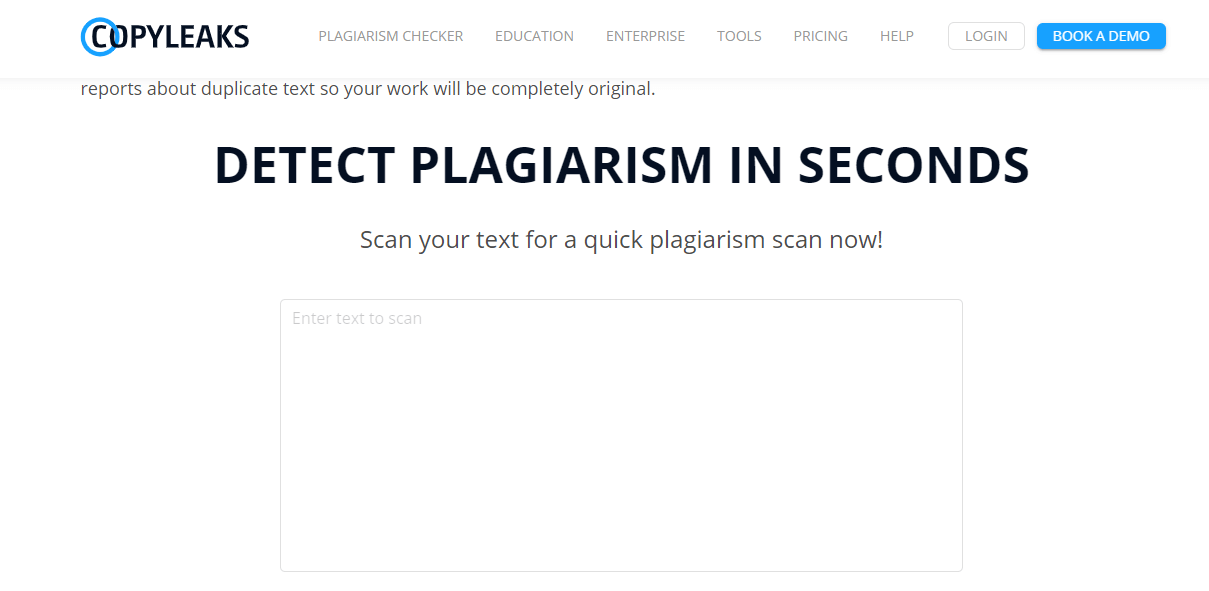


  *fig. 2. Copy Leaks*
[Image Source](https://static.javatpoint.com/blog/images/plagiarism-detection-tools2.png)


Pros
1. For Business and Education
2. Multiple File Formats and Languages

Cons
1. Free Page Restriction
2. We can Use it Only After You Sign Up


Plagiarism tools are very quick, exact and can work in numerous languages. The AI-powered tools further have progressed multi-layered search mechanisms, via which they can wade through billions of private documents, scientific and medical jounals and public databases.
With the help of plagiarism tools, we can easily find our the copied or duplicate content.[[1]](https://www.javatpoint.com/plagiarism-tools#:~:text=Plagiarism%20Checker,is%20no%20need%20to%20download.)

# Language Modeling
**A language model is a statistical model that captures relevant linguistic features of the corpus on which it is trained.** At a basic level, it should capture the frequency distribution of letters and words. A more advanced language model should capture syntactic and grammatical dependencies, such as agreement and inflection, and semantic properties, such as which words are likely to occur in a given context. [[1]](https://towardsdatascience.com/simple-plagiarism-detection-in-python-2314ac3aee88)

Language models are usually used for two major tasks:


1.   Scoring
2.   Generation


In **scoring**, the language model gives a probability score to certain word occurring in a given context. 

Given the context *machine learning is _____*, it should hopefully give a higher score to the completion *fun* than to the completion *octopus*, assuming it is trained on a representative sample of English text.


In **generation**, the model samples from the learned distribution to generate fake but plausible-sounding text. 

Claude Shannon discussed language models in [his seminal 1948 paper](http://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf), and the ability to assign a probability to a sequence of words is a great achievement of information theory.[[3]](http://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf)


To apply language modeling to plagiarism detection, you can train a language model on a bunch of text that you think people may copy from. 

Let’s say you are currently teaching about the **Gold Foil Experiment** in a chemistry class. You could take several relevant Wikipedia articles, the top 10 Google search results for “*gold foil experiment*”, and perhaps student submission from the last several years (if you’re worried about hand-me-down papers) and dump them in a single text file. This aggregated dataset will be our training data that we use to build a language model, which captures the statistical features of the text.

**Once we have this language model, we can run student work through the language model to assign scores.** A higher score means the work is more predictable from the training data, and represents a higher likelihood of plagiarism.


# N-gram Language Model
An N-gram language model scores words dependent on the former window of context. Eventhough the N-gram model doesn't seem to be very sophisticated and fails to deal with long-range dependencies and abstract semantic information, we can actually consider this as a feature rather than a bug for this task. Other language models, like those dependent on Recurrent Neural Networks or Transformers, are better at capturing long-range dependencies and higher levels of abstraction.


** For plagiarism, however, the emphasis is on copied sequence of words, not on similarities at an abstract level.** A paraphrasing should not set off an alarm, but a direct copying should. 


To implement an N-gram language model in Python, we can utilize the NLTK library(one choice among many). Following are the basic steps of training a language model:


1.   Read in and pre-process a training data file(e.g. remove punctuation, casing, and formatting). We would be left with something like 

```
# this is an example sentence
```


2.   Tokenize the training data (i.e. separate into individual words) and add padding at the beginning. This would leave us with 

```
# ['<s>', '<s>', 'this', 'is', 'an', 'example', 'sentence']
```


3.   Generate N-grams from the training data using the nltk.ngrams or nltk.everygrams methods. For an N-gram size of 3, this would give us something like 

```
# [('<s>', '<s>', 'this'),
   ('<s>', 'this', 'is'),
   ('this', 'is', 'an'),
   ('is', 'an', 'example'),
   ('an', 'example', 'sentence')]
```
Note that everygrams would also give us the unigrams and bigrams, in addition to trigrams.


4.   Fit a model using these N-grams. NLTK has various models that can be used, ranging from a basic MLE(Maximum Likelihood Estimator) to more advanced models like `WrittenBellInterpolated` that use interpolation to deal with unseen N-grams.

Once we have the trained model, it supports various operations such as scoring a word given a context, or generating a word from the learned probability distribution. It is now time to evaluate some "student work".



# Visualization
Wouldn't it be exciting if we could visualize, at a glance, whether and how much a text was plagiarized? To do this, we can represent a student submission as a heatmap image where each pixel corresponds to the score of one word. This allows us to quickly gauge if plagiarism is likely, and which parts of a text were most likely to have been plagiarized.

** Visualization information in this way is more useful that looking at an array of numerical scores or a summary statistic of all the scores.**

I played around with various ways of visualizing this data, and I came up with the following method:



1.   Display *K* words per line (I used K=8). This is the heatmap width in pixels. Then calculate the height (number of words in testing data divided by *K*).
2.   Due to the small size of the dataset and the challenges of interpolation, there is some uncertainity in the assigned scores, so I applied Gaussian smoothing to the scores.
3.   Reshape the array of scores into a rectangle of *K* columns and *height* rows. This requires adding zero padding to ensure the array is the correct size.
4.   Use Plotly Heatmap to show the image using the colorscale of your choice.
5.   Show the *K* words of text as a y-axis tick label next to the corresponding row of the heatmap for easy side-by-side comparison. Adjust the hover data so that each pixel shows its corresponding word on hover.

To test this approach, I trained the plagiarism detection model on the Wikipedia article for the Geiger-Marsden Experiment, also known as the Gold Foil experiment. For the "student work", I compared two submissions, one which was copied with minor changes from Wikipedia, and one which came from a completely different source talking about the same topic.


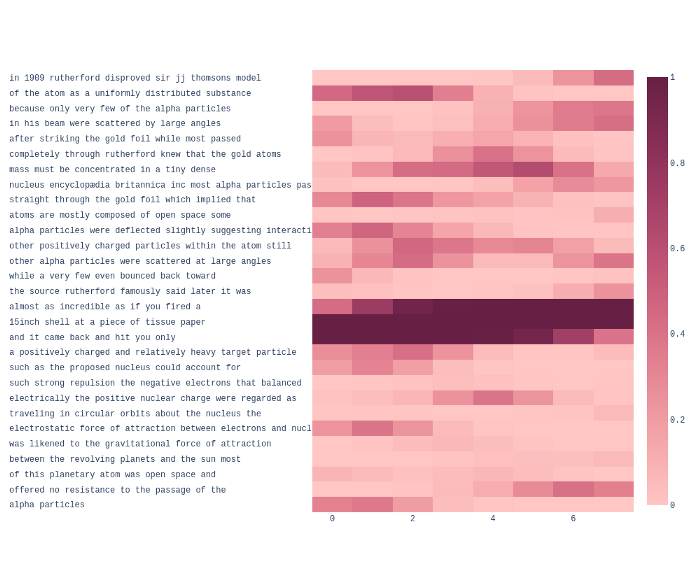



*fig. 3. The non-plagiarized example, in which the text is not taken from the Wikipedia article. Note the dark region that corresponds to the famous quote by Rutherford, which also appeared in the Wikipedia article. If you see something like this, you can check to make sure it was properly cited, otherwise it may be evidence of plagiarism. Image by Author.*
[Image Source](https://miro.medium.com/max/700/1*ELmH_lforiUZxu07pYvLtQ.png)








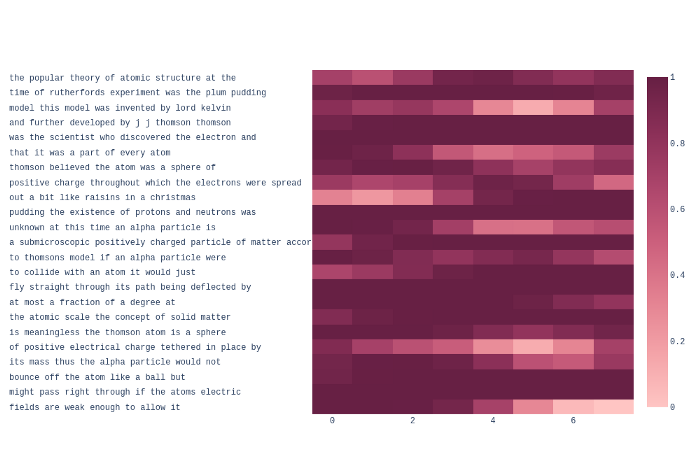


*fig. 4. The plagiarized example, in which the text is taken from Wikipedia with sporadic replacement of words here and there. The lighter colored pixels correspond to the modified words. This method makes it easier to tell which parts of a text were plagiarized. Image by Author.*
[Image Source](https://miro.medium.com/max/700/1*lOsm-vJ_G0qqgBvY9fdXcw.png)



# Source Code


In [ ]:
import re
from nltk.util import ngrams, pad_sequence, everygrams
from nltk.tokenize import word_tokenize
from nltk.lm import MLE, WittenBellInterpolated
import numpy as np
import plotly.graph_objects as go
from scipy.ndimage import gaussian_filter

# Training data file
train_data_file = ""

# read training data
with open(train_data_file) as f:
    train_text = f.read().lower()

# apply preprocessing (remove text inside square and curly brackets and rem punc)
train_text = re.sub(r"\[.*\]|\{.*\}", "", train_text)
train_text = re.sub(r'[^\w\s]', "", train_text)

# set ngram number
n = 4

# pad the text and tokenize
training_data = list(pad_sequence(word_tokenize(train_text), n, 
                                  pad_left=True, 
                                  left_pad_symbol="<s>"))

# generate ngrams
ngrams = list(everygrams(training_data, max_len=n))
print("Number of ngrams:", len(ngrams))

# build ngram language models
model = WittenBellInterpolated(n)
model.fit([ngrams], vocabulary_text=training_data)
print(model.vocab)

# testing data file
test_data_file = ""

# Read testing data
with open(test_data_file) as f:
    test_text = f.read().lower()
test_text = re.sub(r'[^\w\s]', "", test_text)

# Tokenize and pad the text
testing_data = list(pad_sequence(word_tokenize(test_text), n, 
                                 pad_left=True,
                                 left_pad_symbol="<s>"))
print("Length of test data:", len(testing_data))

# assign scores
scores = []
for i, item in enumerate(testing_data[n-1:]):
    s = model.score(item, testing_data[i:i+n-1])
    scores.append(s)

scores_np = np.array(scores)

# set width and height
width = 8
height = np.ceil(len(testing_data)/width).astype("int32")
print("Width, Height:", width, ",", height)

# copy scores to rectangular blank array
a = np.zeros(width*height)
a[:len(scores_np)] = scores_np
diff = len(a) - len(scores_np)

# apply gaussian smoothing for aesthetics
a = gaussian_filter(a, sigma=1.0)

# reshape to fit rectangle
a = a.reshape(-1, width)

# format labels
labels = [" ".join(testing_data[i:i+width]) for i in range(n-1, len(testing_data), width)]
labels_individual = [x.split() for x in labels]
labels_individual[-1] += [""]*diff
labels = [f"{x:60.60}" for x in labels]

# create heatmap
fig = go.Figure(data=go.Heatmap(
                z=a, x0=0, dx=1,
                y=labels, zmin=0, zmax=1,
                customdata=labels_individual,
                hovertemplate='%{customdata} <br><b>Score:%{z:.3f}<extra></extra>',
                colorscale="burg"))
fig.update_layout({"height":height*28, "width":1000, "font":{"family":"Courier New"}})
fig['layout']['yaxis']['autorange'] = "reversed"
fig.show()

# Conclusion
This is a simple implementation of Plagiarism Detection. There is no denying the fact that there are a lot more features that could be added, for instance, automating the collection of training data, handling quotations, comparing different student submissions to each other, or adapting this to work for plagiarized code rather than text. 


Wrapping up, Plagiarism helps to prevent the thefts of someone's thoughts and logical creativity.

# References
[[1]](https://www.javatpoint.com/plagiarism-tools#:~:text=Plagiarism%20Checker,is%20no%20need%20to%20download.)  https://www.javatpoint.com/plagiarism-tools#:~:text=Plagiarism%20Checker,is%20no%20need%20to%20download.

[[2]](https://towardsdatascience.com/simple-plagiarism-detection-in-python-2314ac3aee88) "Simple Plagiarism Detection in Python"(Thomas Hikaru Clark, Jan 25 https://www.javatpoint.com/plagiarism-tools#:~:text=Plagiarism%20Checker,is%20no%20need%20to%20download.)

[[3]](http://people.math.harvard.edu/~ctm/home/text/others/shannon/entropy/entropy.pdf) Claude Shannon. 1948. "A Mathematical Theory of Communication" (Reprinted with corrections from The Bell System Technical Journal,
Vol. 27, pp. 379–423, 623–656, July, October, 1948.)

[[4]](https://)


